## Machine Leaerning - Linear Regression
We'll explore how Machine Learning can be used to make inherence uing a technique called Linear Regression.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Features and Outputs
Imaging that the x value of each point is the outdoor temperature, and by the y value is the number of people that we observe in the park.

In [38]:
points = np.asarray([(10,20), (15,40), (30,30), (32,40), (5,10), (2,3), (6,5), (20,70), (22,75)])  
print(points)


[[10 20]
 [15 40]
 [30 30]
 [32 40]
 [ 5 10]
 [ 2  3]
 [ 6  5]
 [20 70]
 [22 75]]


We can plot these points using matplotlib, as below:

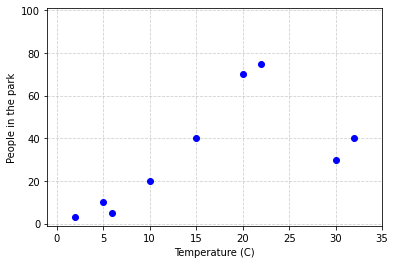

In [41]:
plt.plot(points[:,0], points[:,1], '.', color='blue', markersize=12)
plt.grid(linestyle='--', alpha=0.6)
plt.xlabel('Temperature (C)')
plt.ylabel('People in the park')
plt.xlim((-1,35))
plt.ylim((-1,101))
plt.show()

## Linear Regression by Hand
Now suppose that we want to draw a line that goes trhough the middle of the collection of points with minimal distance
between the line and each point along the y-axis. The equation for a line is y =mx + b, where m is the slope of the of the line and b is the y-intercept. The following code plots a line in addition to the points from before. Change the values of m and b to find a linewith the smallest total distance to the points.

You can also see how the error , measured as residual sum of squares(RSS), varies when you change the m and b values. Your search for good values does not equans to a closed form solution for the optimal m and b values(one exists in this case, and it is eassily computable, but your search is informally what a search-based optimization might do. 

RSS Error: 181.0000


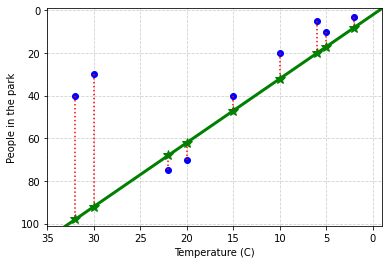

In [45]:
m = 3
b = 2

points_x, points_y = points[:,0], points[:,1]

line_y = m * points_x + b 

distances = np.sqrt((points_y - line_y)**2)
total_distance = np.sum(distances)
print('RSS Error: {:.4f}'.format(total_distance))

plt.plot(points_x, points_y, '.', color='blue', markersize=12)
plt.plot(points_x, line_y, '*', color='green', markersize=10)
for px, py, ly in zip(points_x, points_y, line_y):
    plt.plot([px, px], [py,ly], ':', color='red', linewidth=1.5)
plt.plot([-2, 35], np.array([-2,35])*m + b, '-', color='green', linewidth=3)
plt.grid(linestyle='--', alpha=0.6)
plt.xlabel('Temperature (C)')
plt.ylabel('People in the park')
plt.xlim({-1,35})
plt.ylim({-1,101})
plt.show()

## Linear Regression in Python/Scikit-Learn

Fortunately, there are Python functions which will find the best line for us, so we don't have to do it manually. The following code plots the points, your line in green, and the optimal line determined by the Python LinearRegression function in red.

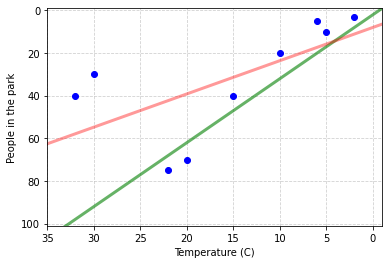

In [49]:
from sklearn import linear_model

linear_regression = linear_model.LinearRegression()

linear_regression.fit(points_x.reshape(-1,1), points_y)

best_line_ys = linear_regression.predict(np.array([-2,35]).reshape(-1,1))

plt.plot(points_x, points_y, '.', color='blue', markersize=12)

plt.plot([-2, 35], np.array([-2,35])*m + b, '-', color='green', linewidth=3, alpha=0.6)

plt.plot([-2, 35], best_line_ys, color='red', alpha=0.4, linewidth=3)

plt.grid(linestyle='--', alpha=0.6)
plt.xlabel('Temperature (C)')
plt.ylabel('People in the park')
plt.xlim({-1,35})
plt.ylim({-1,101})
plt.show()